In [2]:
import pandas as pd
import numpy as np

In [45]:
# 显示中文标签,处理中文乱码问题
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
# 坐标轴负号的处理
plt.rcParams['axes.unicode_minus'] = False
# 将横、纵坐标轴标准化处理，确保饼图是一个正圆，否则为椭圆

In [3]:
dg = pd.read_excel(r'D:\新建文件夹 (2)\柯内特数据分析比赛\dongguan.xlsx')

In [4]:
# 将监测时间列转换为日期时间类型
dg['监测时间'] = pd.to_datetime(dg['监测时间'])

In [5]:
dg

,河流,断面名称,监测时间,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度,站点情况
0,石马河,旗岭,2022-05-01 00:00:00,Ⅳ,28.19,7.223,6.165,4.215,0.2254,0.2168,9.619,676.438,50.000,正常
1,东莞运河,樟村(家乐福),2022-05-01 00:00:00,Ⅳ,28.48,7.004,4.685,3.358,0.2797,0.0965,8.288,605.997,27.600,正常
2,东江,沙田泗盛,2022-05-01 00:00:00,Ⅳ,25.52,7.215,4.990,3.191,0.0250,0.0663,3.406,1028.458,53.600,正常
3,东江南支流,石龙南河,2022-05-01 00:00:00,Ⅲ,26.36,6.720,5.232,2.105,0.0751,0.0669,2.401,227.800,21.880,正常
4,石马河,旗岭,2022-05-01 08:00:00,Ⅳ,26.74,7.250,6.335,4.301,0.3662,0.2508,9.630,679.026,83.590,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,东江南支流,石龙南河,2023-05-31 16:00:00,Ⅲ,29.87,6.658,5.208,2.121,0.0298,0.0637,2.357,200.723,13.806,正常
8363,石马河,旗岭,2023-05-31 20:00:00,Ⅲ,33.36,7.359,6.965,4.944,0.4019,0.1779,8.705,567.406,54.600,正常
8364,东莞运河,樟村（家乐福）,2023-05-31 20:00:00,Ⅳ,32.20,6.698,3.069,4.722,0.5925,0.1152,5.483,494.728,39.960,正常
8365,东江,沙田泗盛,2023-05-31 20:00:00,Ⅳ,30.06,7.021,4.931,4.550,0.0658,0.0618,2.680,4198.978,29.800,正常


In [151]:
# 每条河流的化学成分平均值
dg.groupby('河流').mean()

,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度
河流,,,,,,,,,
东江,24.464243,7.109379,4.951985,3.184294,0.152850,0.067740,2.602825,7078.144817,45.684574
东江南支流,24.723722,7.011300,6.908700,1.648496,0.064064,0.057408,2.201740,168.868514,22.743773
东莞运河,25.502986,6.815396,5.069663,3.561892,0.750215,0.123054,7.523631,493.582134,22.105371
石马河,25.638002,7.141896,6.098316,4.104488,0.964430,0.253138,9.211307,509.439405,89.402477


In [263]:
dg_smh = dg[dg['河流'] == '石马河']
dg_dgyh = dg[dg['河流'] == '东莞运河']
dg_dj = dg[dg['河流'] == '东江']
dg_djnzl = dg[dg['河流'] == '东江南支流']
print(dg_smh.shape, dg_dgyh.shape, dg_dj.shape, dg_djnzl.shape)

(2109, 14) (2100, 14) (2068, 14) (2090, 14)


In [264]:
# 生成完整的时间序列
start_time = dg['监测时间'].min()
end_time = dg['监测时间'].max()
time_range = pd.date_range(start=start_time, end=end_time, freq='4H')
# 使用时间序列作为索引并重新设置索引
dg_smh = dg_smh.set_index('监测时间')
dg_smh = dg_smh.reindex(time_range)

dg_dgyh = dg_dgyh[~dg_dgyh['监测时间'].duplicated()]
dg_dgyh = dg_dgyh.set_index('监测时间')
dg_dgyh = dg_dgyh.reindex(time_range)

dg_dj = dg_dj.set_index('监测时间')
dg_dj = dg_dj.reindex(time_range)

dg_djnzl = dg_djnzl.set_index('监测时间')
dg_djnzl = dg_djnzl.reindex(time_range)
# 使用上一个非缺失行填充整行缺失数据或者使用上一个非缺失值填充数值缺失数据
dg_smh = dg_smh.fillna(method='ffill')
dg_dgyh = dg_dgyh.fillna(method='ffill')
dg_dj = dg_dj.fillna(method='ffill')
dg_djnzl = dg_djnzl.fillna(method='ffill')
print(dg_smh.shape, dg_dgyh.shape, dg_dj.shape, dg_djnzl.shape)

(2376, 13) (2376, 13) (2376, 13) (2376, 13)


In [265]:
dg_smh

,河流,断面名称,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度,站点情况
2022-05-01 00:00:00,石马河,旗岭,Ⅳ,28.19,7.223,6.165,4.215,0.2254,0.2168,9.619,676.438,50.00,正常
2022-05-01 04:00:00,石马河,旗岭,Ⅳ,28.19,7.223,6.165,4.215,0.2254,0.2168,9.619,676.438,50.00,正常
2022-05-01 08:00:00,石马河,旗岭,Ⅳ,26.74,7.250,6.335,4.301,0.3662,0.2508,9.630,679.026,83.59,正常
2022-05-01 12:00:00,石马河,旗岭,Ⅳ,25.78,7.232,6.348,4.301,0.3987,0.2637,9.630,672.889,70.82,正常
2022-05-01 16:00:00,石马河,旗岭,Ⅳ,25.18,7.218,6.186,4.779,0.6622,0.2486,9.620,649.484,73.13,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 04:00:00,石马河,旗岭,Ⅲ,32.08,7.250,6.152,4.818,0.5029,0.1943,9.085,561.534,60.72,正常
2023-05-31 08:00:00,石马河,旗岭,Ⅲ,32.38,7.287,6.595,4.252,0.3549,0.1863,8.525,561.464,54.28,正常
2023-05-31 12:00:00,石马河,旗岭,Ⅲ,33.75,7.562,8.840,4.773,0.2498,0.1759,8.437,560.502,47.36,正常
2023-05-31 16:00:00,石马河,旗岭,Ⅲ,33.99,7.573,8.721,4.944,0.4095,0.1735,8.705,574.825,46.41,正常


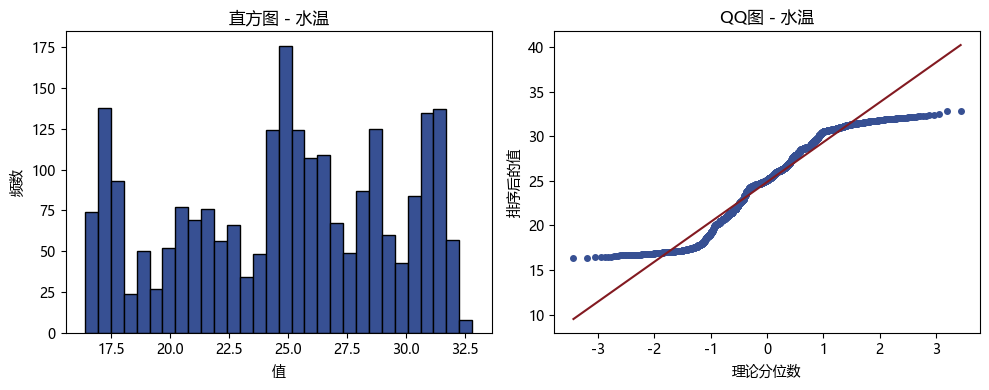

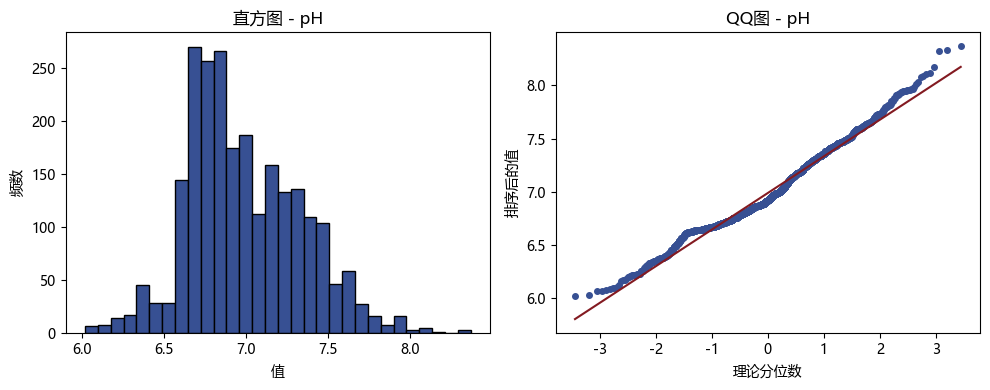

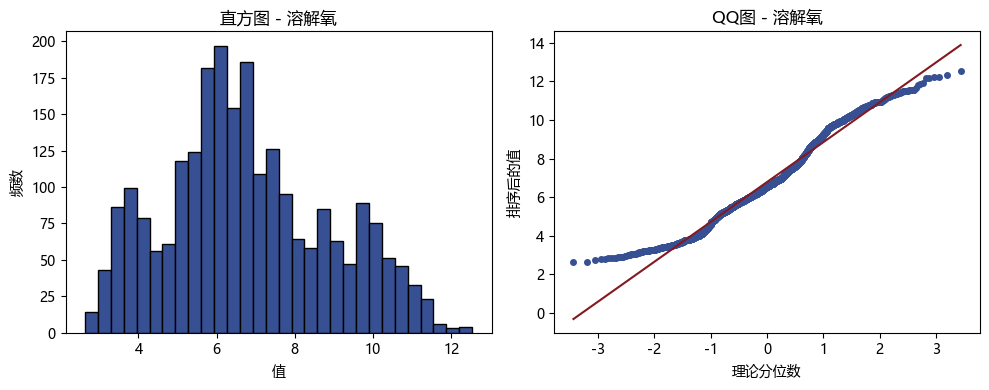

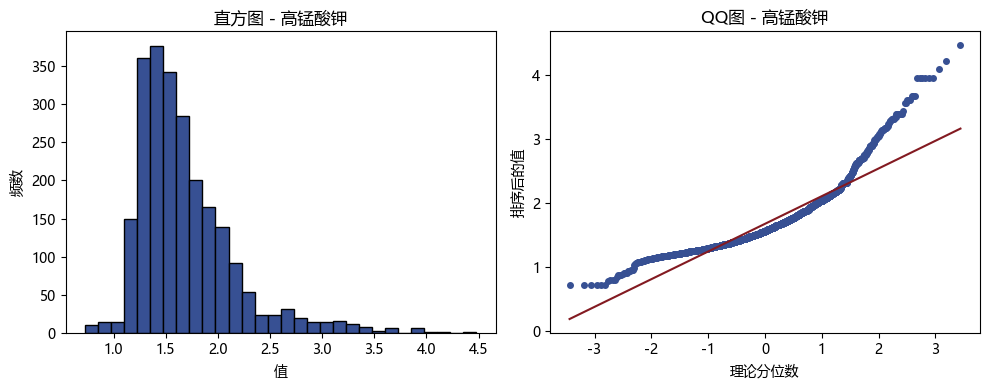

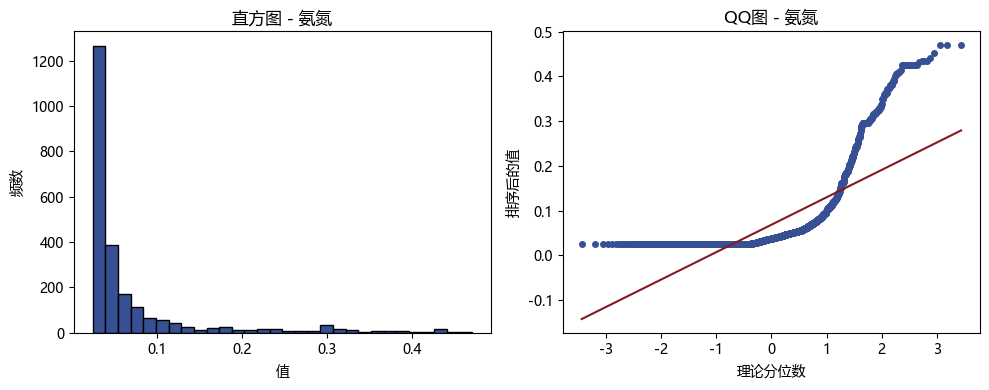

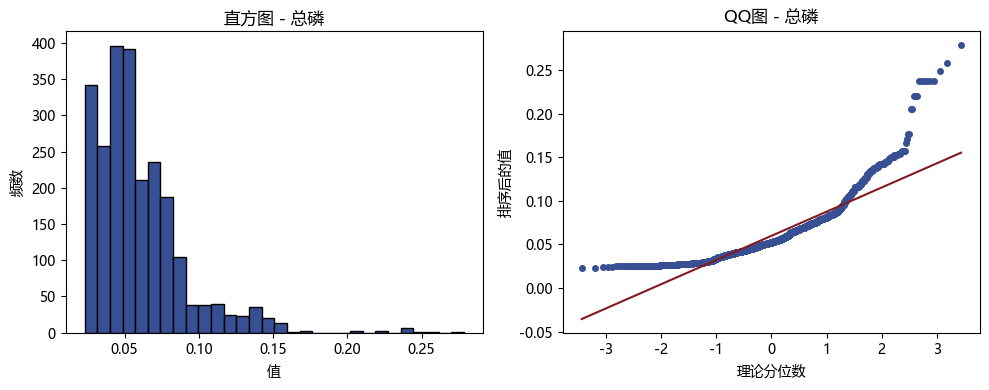

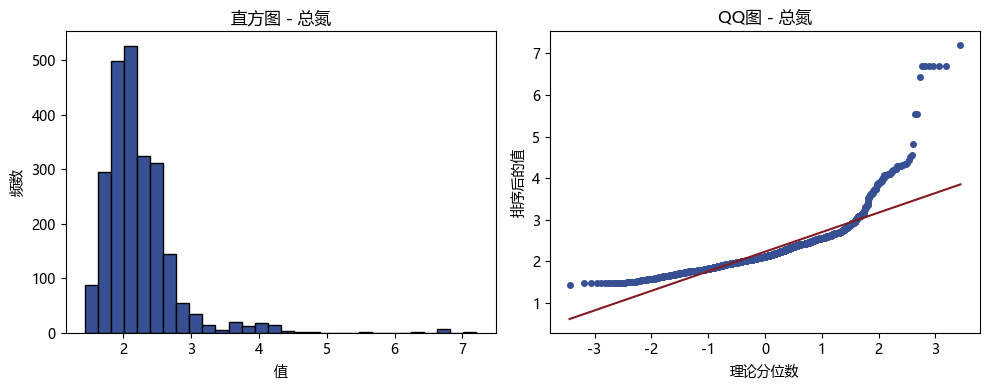

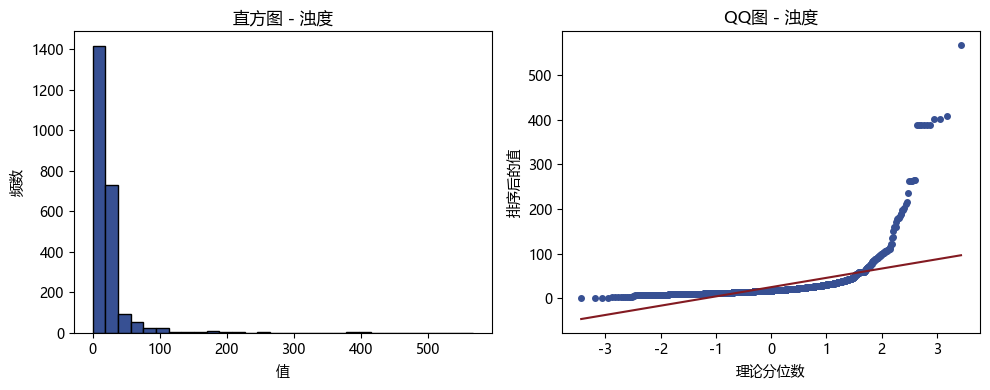

符合正态分布的列： ['电导率']
不符合正态分布的列： ['水温', 'pH', '溶解氧', '高锰酸钾', '氨氮', '总磷', '总氮', '浊度']


In [266]:
# 判断是否符合正态分布
import scipy.stats as stats
import matplotlib.pyplot as plt

numeric_columns = ['水温', 'pH', '溶解氧', '高锰酸钾', '氨氮', '总磷', '总氮', '电导率', '浊度']

def is_normal_distribution(df):
    normal_columns = []  # 存储符合正态分布的列
    non_normal_columns = []  # 存储不符合正态分布的列

    for column in df.columns:
        data = df[column].dropna()  # 去除缺失值

        # 偏度检验
        _, p_value_skew = stats.skewtest(data)

        # 峰度检验
        _, p_value_kurtosis = stats.kurtosistest(data)

        # 正态性检验
        _, p_value_normality = stats.normaltest(data)

        if p_value_skew > 0.05 and p_value_kurtosis > 0.05 and p_value_normality > 0.05:
            normal_columns.append(column)
        else:
            non_normal_columns.append(column)
            # 绘制直方图
            plt.figure(figsize=(10, 4), dpi=100)
            plt.subplot(1, 2, 1)
            plt.hist(data, bins=30, color='#375093', edgecolor='black')
            plt.title(f'直方图 - {column}')
            plt.xlabel('值')
            plt.ylabel('频数')

            # 绘制QQ图
            ax = plt.subplot(1, 2, 2)
            stats.probplot(data, dist="norm", plot=ax)
            ax.get_lines()[0].set_markerfacecolor('#375093')  # 设置QQ图中数据点的颜色
            ax.get_lines()[0].set_markeredgecolor('#375093')  # 设置QQ图中样本点的边缘颜色
            ax.get_lines()[0].set_markersize(4)  # 设置QQ图中数据点的大小
            ax.get_lines()[1].set_color('#831A21')  # 设置QQ图中参考线的颜色
            plt.title(f'QQ图 - {column}')
            plt.xlabel('理论分位数')
            plt.ylabel('排序后的值')

            # 调整子图之间的间距
            plt.tight_layout()

            # 显示图形
            plt.show()
    print("符合正态分布的列：", normal_columns)
    print("不符合正态分布的列：", non_normal_columns)

# 使用示例
is_normal_distribution(dg_djnzl[numeric_columns])


In [267]:
# 异常值检测
# def outlier_detection_group(df, group_column, col='', level=''):
#     numeric_columns = ['水温', 'pH', '溶解氧', '高锰酸钾', '氨氮', '总磷', '总氮', '电导率', '浊度']

#     replacements = {}
#     outliers = []

#     for column in numeric_columns:
#         grouped = df.groupby(group_column)
        
#         column_replacements = 0

#         for group_name, group_data in grouped:
#             # 使用箱线图检测异常值
#             q1 = group_data[column].quantile(0.25)  # 下四分位数
#             q3 = group_data[column].quantile(0.75)  # 上四分位数
#             iqr = q3 - q1  # 四分位距
#             alpha = 1.5  # 箱线图中的α值

#             lower_bound = q1 - alpha * iqr  # 下界
#             upper_bound = q3 + alpha * iqr  # 上界

#             # 统计离群值替换数量
#             tmp = len(group_data[(group_data[column] < lower_bound) | (group_data[column] > upper_bound)])
#             column_replacements += tmp
            
#             # 使用指数加权移动平均法替换离群值
#             df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].ewm(alpha=0.5).mean(), df[column])
            
#             # 绘制箱线图
#             if column == col and group_name == level:
#                 plt.figure(figsize=(8, 6), dpi=80)
#                 box = plt.boxplot(group_data[column], notch=True, sym='b+')

#                 # 标记异常值数量
#                 plt.text(0.95, 0.95, f"异常值数量: {tmp}", transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black'))

#                 plt.title(f'箱线图 - {column} ({group_name})')
#                 plt.xlabel('变量')
#                 plt.ylabel('值')
#                 plt.show()
            
#         replacements[column] = column_replacements

#     print("离群值替换数量：", replacements)
#     return df


# # 根据水质类别分组检测异常值
# dg_smh = outlier_detection_group(dg_smh, '水质类别', 'pH', 'Ⅳ')
# dg_dgyh = outlier_detection_group(dg_dgyh, '水质类别')
# dg_dj = outlier_detection_group(dg_dj, '水质类别')
# dg_djnzl = outlier_detection_group(dg_djnzl, '水质类别')

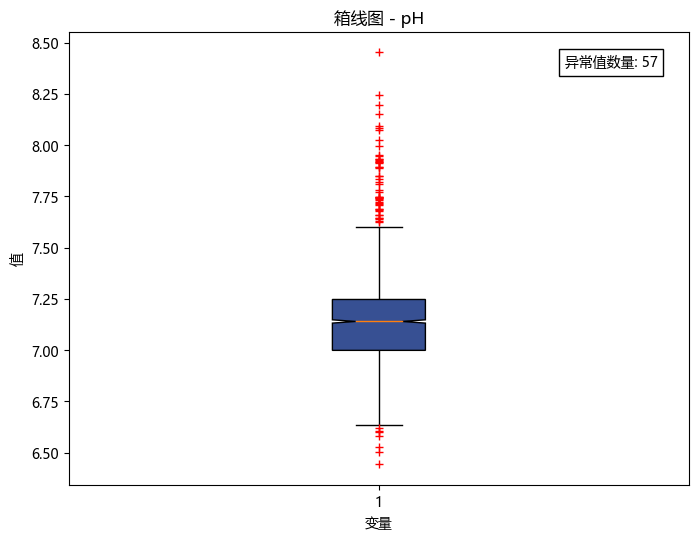

离群值替换数量： {'水温': 0, 'pH': 57, '溶解氧': 24, '高锰酸钾': 190, '氨氮': 110, '总磷': 204, '总氮': 4, '电导率': 105, '浊度': 135}
离群值替换数量： {'水温': 0, 'pH': 45, '溶解氧': 0, '高锰酸钾': 28, '氨氮': 40, '总磷': 114, '总氮': 6, '电导率': 0, '浊度': 46}
离群值替换数量： {'水温': 1, 'pH': 0, '溶解氧': 0, '高锰酸钾': 70, '氨氮': 128, '总磷': 40, '总氮': 317, '电导率': 0, '浊度': 121}
离群值替换数量： {'水温': 0, 'pH': 11, '溶解氧': 1, '高锰酸钾': 128, '氨氮': 291, '总磷': 122, '总氮': 98, '电导率': 11, '浊度': 193}


In [268]:
# 异常值检测
import numpy as np
import pandas as pd
from scipy.stats import zscore

def outlier_detection(df, col=''):
    numeric_columns = ['水温', 'pH', '溶解氧', '高锰酸钾', '氨氮', '总磷', '总氮', '电导率', '浊度']
    
    replacements = {}
    
    for column in df[numeric_columns]:
        # 使用箱线图检测异常值
        q1 = df[column].quantile(0.25)  # 下四分位数
        q3 = df[column].quantile(0.75)  # 上四分位数
        iqr = q3 - q1  # 四分位距
        alpha = 1.5  # 箱线图中的α值

        lower_bound = q1 - alpha * iqr  # 下界
        upper_bound = q3 + alpha * iqr  # 上界
        # 统计离群值替换数量
        replacements[column] = len(df[(df[column] < lower_bound) | (df[column] > upper_bound)])
                
        # 绘制箱线图
        if column == col:
            plt.figure(figsize=(8, 6), dpi=100)
            box = plt.boxplot(df[column], sym='r+', notch=True, patch_artist=True, boxprops=dict(facecolor='#375093'))

            # 标记异常值数量
            plt.text(0.95, 0.95, f"异常值数量: {replacements[column]}", transform=plt.gca().transAxes, ha='right', va='top', bbox=dict(facecolor='white', edgecolor='black'))
            
            plt.title(f'箱线图 - {column}')
            plt.xlabel('变量')
            plt.ylabel('值')
            plt.show()
            
        # 使用指数加权移动平均法替换离群值
        df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), df[column].ewm(alpha=0.5).mean(), df[column])

    print("离群值替换数量：", replacements)

    return df



# 对水质监测数据的数值列应用离群值检测和替换函数
dg_smh = outlier_detection(dg_smh, 'pH')
dg_dgyh = outlier_detection(dg_dgyh)
dg_dj = outlier_detection(dg_dj)
dg_djnzl = outlier_detection(dg_djnzl)

In [269]:
dg_pre = pd.concat([dg_smh, dg_dgyh, dg_dj, dg_djnzl])
dg_pre

,河流,断面名称,水质类别,水温,pH,溶解氧,高锰酸钾,氨氮,总磷,总氮,电导率,浊度,站点情况
2022-05-01 00:00:00,石马河,旗岭,Ⅳ,28.19,7.223,6.165,4.215,0.2254,0.2168,9.619,676.438,50.000,正常
2022-05-01 04:00:00,石马河,旗岭,Ⅳ,28.19,7.223,6.165,4.215,0.2254,0.2168,9.619,676.438,50.000,正常
2022-05-01 08:00:00,石马河,旗岭,Ⅳ,26.74,7.250,6.335,4.301,0.3662,0.2508,9.630,679.026,83.590,正常
2022-05-01 12:00:00,石马河,旗岭,Ⅳ,25.78,7.232,6.348,4.301,0.3987,0.2637,9.630,672.889,70.820,正常
2022-05-01 16:00:00,石马河,旗岭,Ⅳ,25.18,7.218,6.186,4.779,0.6622,0.2486,9.620,649.484,73.130,正常
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-05-31 04:00:00,东江南支流,石龙南河,Ⅳ,29.14,6.628,4.793,2.153,0.0305,0.0615,2.329,197.019,12.473,正常
2023-05-31 08:00:00,东江南支流,石龙南河,Ⅲ,29.03,6.643,5.087,2.063,0.0250,0.0614,2.291,193.060,14.595,正常
2023-05-31 12:00:00,东江南支流,石龙南河,Ⅲ,29.74,6.695,5.483,2.228,0.0250,0.0598,2.289,201.519,10.515,正常
2023-05-31 16:00:00,东江南支流,石龙南河,Ⅲ,29.87,6.658,5.208,2.121,0.0298,0.0637,2.357,200.723,13.806,正常


In [39]:
dg_pre.to_csv(r'D:\新建文件夹 (2)\柯内特数据分析比赛\dongguan-预处理.csv', index=True, index_label='监测时间', header=True, encoding='GBK')